In [75]:
import dynamiqs as dq
import jax.numpy as jnp
import numpy as np

In [2]:
# parameters
n = 16          # Hilbert space dimension
omega = 1.0     # frequency
kappa = 0.1     # decay rate
alpha0 = 1.0    # initial coherent state amplitude
T = 2 * jnp.pi  # total evolution time (one full revolution)

# initialize operators, initial state and saving times
a = dq.destroy(n)
H = omega * a.dag() @ a
jump_ops = [jnp.sqrt(kappa) * a]
psi0 = dq.coherent(n, alpha0)
tsave = jnp.linspace(0, T, 101)

# run simulation
result = dq.mesolve(H, jump_ops, psi0, tsave)
print(result)

|█████████████████████████████████████████████████████████████████████████| 100.0% ◆ elapsed 10.76ms ◆ remaining 0.00ms

==== MESolveResult ====
Method : Tsit5
Infos  : 40 steps (40 accepted, 0 rejected)
States : QArray complex64 (101, 16, 16) | 202.0 Kb


In [5]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

dq.plot.mplstyle(dpi=150)  # set custom matplotlib style

In [6]:
# initial state
psi0 = dq.fock(2, 0)

# Hamiltonian
delta = 0.3  # detuning
Omega = 1.0  # Rabi frequency
H = delta * dq.sigmaz() + Omega * dq.sigmax()

print(f"State of type {type(psi0)} and shape {psi0.shape}.")
print(f"Hamiltonian of type {type(H)} and shape {H.shape}.")

State of type <class 'dynamiqs.qarrays.dense_qarray.DenseQArray'> and shape (2, 1).
Hamiltonian of type <class 'dynamiqs.qarrays.sparsedia_qarray.SparseDIAQArray'> and shape (2, 2).


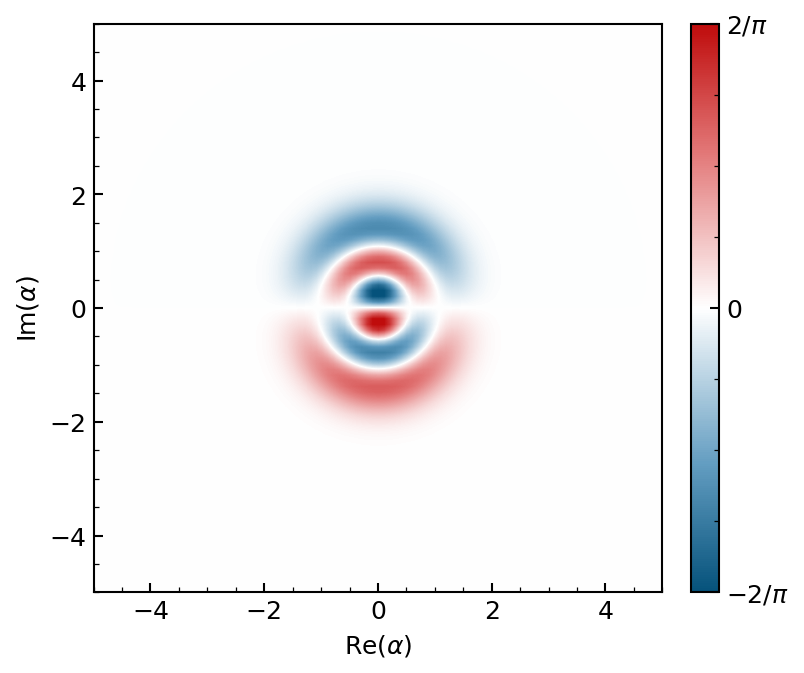

In [229]:
psi = 1j*dq.fock(10, 2)@dq.fock(10,3).dag()
dq.plot.wigner(psi)

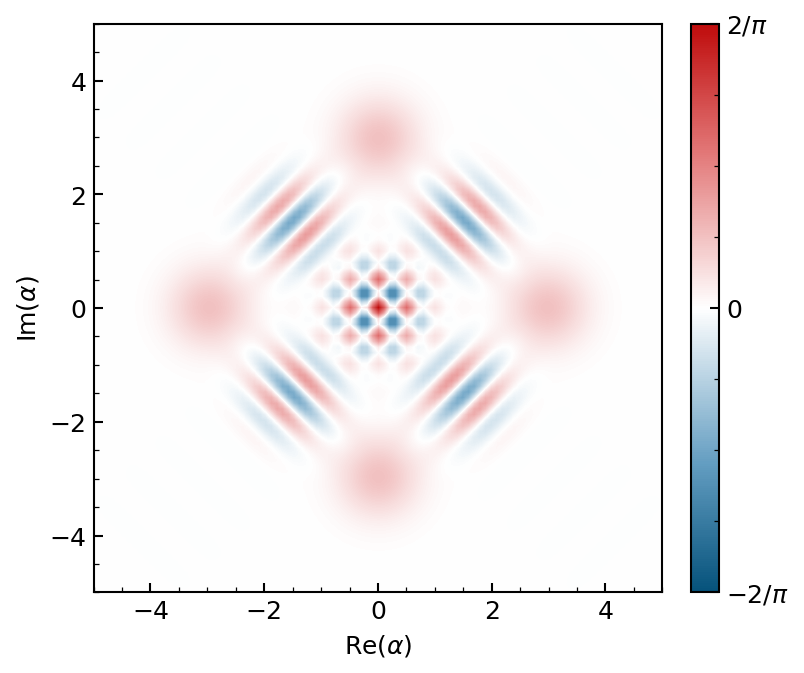

In [29]:
psi0 = 1/jnp.sqrt(4) *(dq.coherent(100, 3) + dq.coherent(100, 3j) + dq.coherent(100, -3) + dq.coherent(100, -3j) )
dq.plot.wigner(psi0)

In [70]:
a, b = dq.destroy(10, 10)
g_2 = 1.0
e_b = -4
k_b = 10
H = g_2*(a@a@b.dag() + a.dag()@a.dag()@b) + e_b*(b+b.dag())
rho0 = dq.coherent((10, 10), (0,0)) 

In [76]:
res = dq.mesolve(H, [np.sqrt(k_b)*b], rho0, tsave=jnp.linspace(0,4,101))

|████████████████████████████████████████████████████████████████████████| 100.0% ◆ elapsed 234.42ms ◆ remaining 0.00ms


In [77]:
res.states.shape

(101, 100, 100)

In [78]:
gif = dq.plot.wigner_gif(res.states, ymax=3, gif_duration=5)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:14<00:00,  3.57it/s]


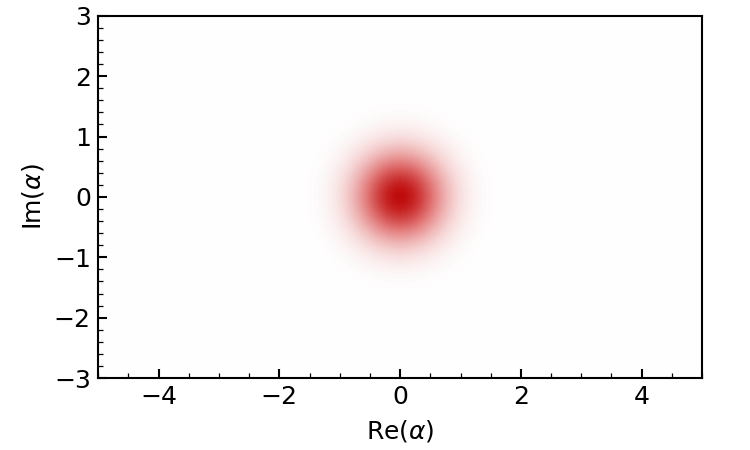

In [74]:
gif

In [59]:
a, b = dq.destroy(10, 10)
g2 = 1
eps = -4
kappa = 10
T = 4
ntsave = 201
rho = dq.fock_dm((100,100),(0,0))
H = g2*(a.dag() @ a.dag() @ b) + g2*(a @ a @ b.dag()) + eps*b+ eps*b.dag()
jump_ops = [b]
tsave = jnp.linspace(0.0, T, ntsave)
result = dq.mesolve(H, jump_ops, rho, tsave)
gif = dq.plot.wigner_gif(result.states, ymax=3.0, gif_duration=5.0)

In [58]:
a

QArray: shape=(10000, 10000), dims=(100, 100), dtype=complex64, layout=dia, ndiags=1
[[  ⋅      ⋅      ⋅    ...   ⋅      ⋅      ⋅   ]
 [  ⋅      ⋅      ⋅    ...   ⋅      ⋅      ⋅   ]
 [  ⋅      ⋅      ⋅    ...   ⋅      ⋅      ⋅   ]
 ...
 [  ⋅      ⋅      ⋅    ...   ⋅      ⋅      ⋅   ]
 [  ⋅      ⋅      ⋅    ...   ⋅      ⋅      ⋅   ]
 [  ⋅      ⋅      ⋅    ...   ⋅      ⋅      ⋅   ]]

In [53]:
n = 16
a = dq.destroy(n)
H = dq.zeros(n)
jump_ops = [a @ a - 4.0 * dq.eye(n)]  # cat state inflation
psi0 = dq.coherent(n, 0)
tsave = jnp.linspace(0, 1.0, 1001)
result = dq.mesolve(H, jump_ops, psi0, tsave)
gif = dq.plot.wigner_gif(result.states, fps=25, xmax=4.0, ymax=2.0)

|█████████████████████████████████████████████████████████████████████████| 100.0% ◆ elapsed 19.26ms ◆ remaining 0.00ms
100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [00:11<00:00, 10.48it/s]


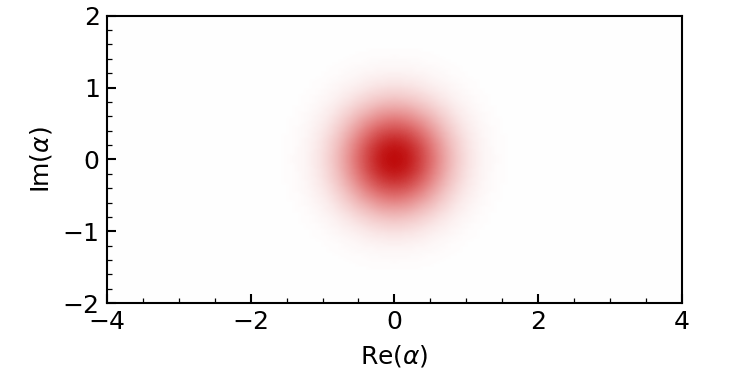

In [54]:
gif

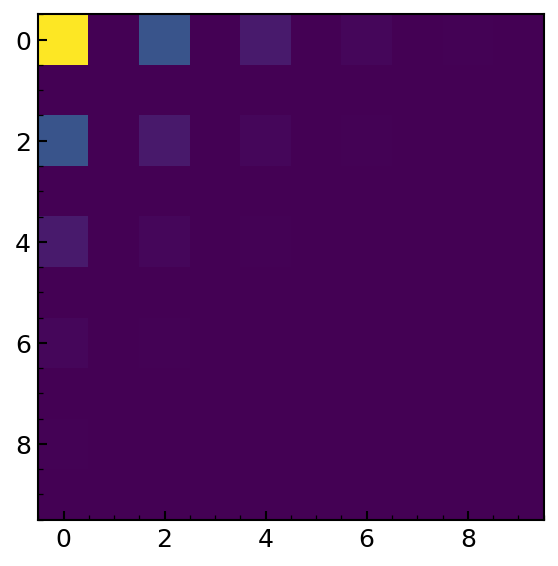

In [98]:
plt.imshow(jnp.real(result.states[100].to_jax()[0:10, 0:10]))

In [108]:
dq.fock(12,2).dims

(12,)

In [127]:
np.float32(sampler.W[np.argmin(tmp)][np.argmin(np.abs(sampler.X-0.2))])

np.float32(-0.20720564)

In [114]:
tmp = np.abs(sampler.X-0.7)
np.unravel_index(, tmp.shape)

(np.int64(112),)

In [406]:
n = 5

class state_sampler:
    def __init__(self, state, noise=False):
        self.dim = state.dims[0]
        self.state = state
        self.X, self.Y, self.W = dq.wigner(state)
        self.noise = noise

    def get_sample(self,x):
        ndim = len(np.array(x).shape)
        if ndim==1:
            val = np.float32(sampler.W[np.argmin(np.abs(self.X-x[0]))][np.argmin(np.abs(self.Y-x[1]))])
            return val + self.noise * np.random.rand() if self.noise else val
        elif ndim==2:
            return np.array([self.get_sample(y) for y in x])
        print(f"NOPE ndim={ndim}")
        return
        

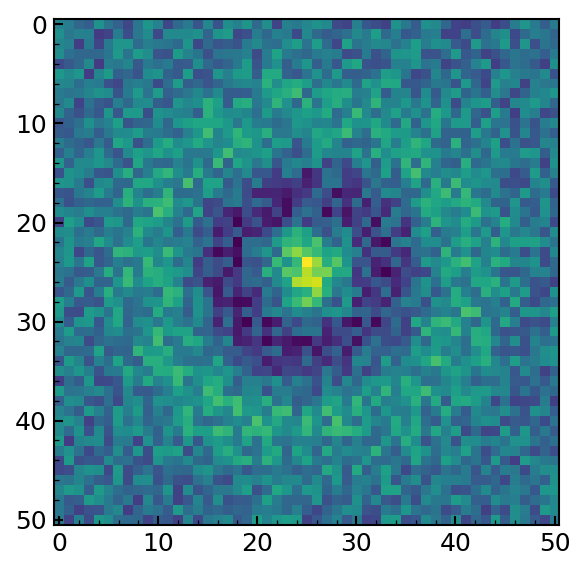

In [231]:
sampler = state_sampler(dq.fock(12,2), 0.5)

val = np.array([[sampler.get_sample([x,p]) for p in np.linspace(-2, 2, 51)] for x in np.linspace(-2, 2, 51)])
plt.imshow(val)

In [166]:
import scipy as sp

def rel_entropy(pred, ground_truth):
    return np.trace(ground_truth@(sp.linalg.logm(pred, disp=False)[0] - sp.linalg.logm(ground_truth, disp=False)[0]))

In [201]:
psi = np.array([0,1,0,0,0,0]).reshape((-1,1))
rho = psi @ psi.T
noise = 0*np.random.rand(6,6)
noise = noise@noise.conjugate().T
rel_entropy(rho+noise, rho)

np.float64(0.0)

# BLR

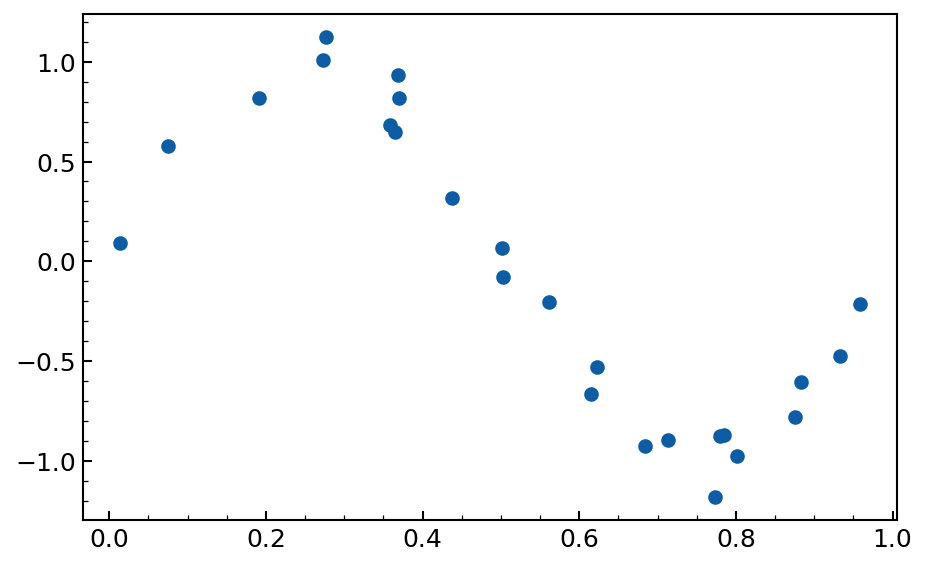

In [212]:
import numpy as np

def func(x):
    return np.sin(2 * np.pi * x)

size = 25
rng = np.random.RandomState(1234)
x_train = rng.uniform(0.0, 1.0, size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0.0, 1.0, 100)
plt.scatter(x_train, y_train)

In [214]:
from sklearn.linear_model import BayesianRidge

n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

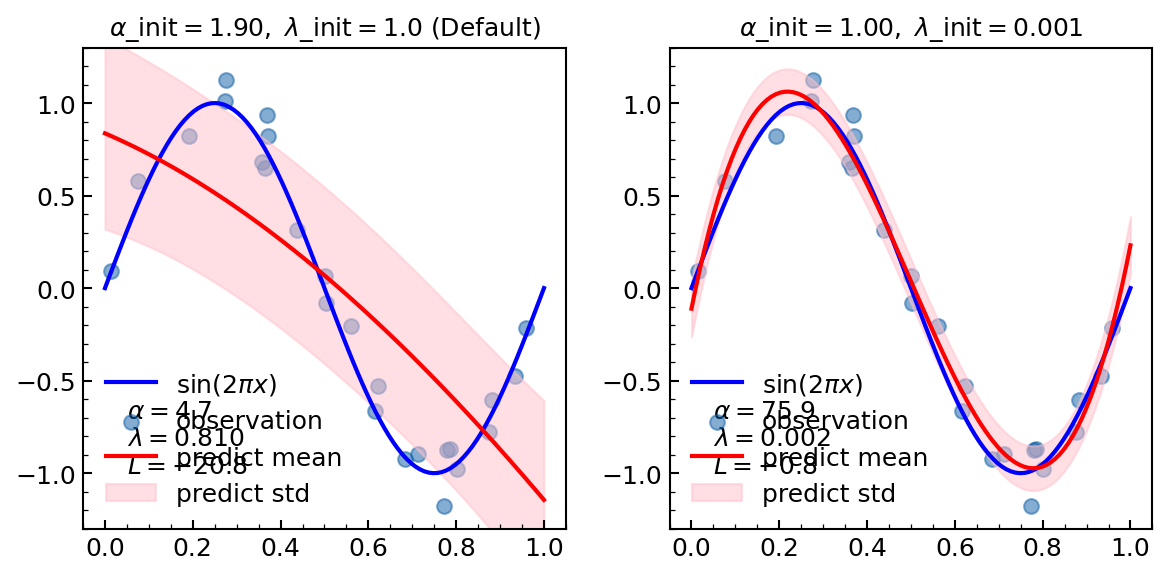

In [216]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Default values
    elif i == 1:
        init = [1.0, 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(
        x_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std"
    )
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
        reg.alpha_, reg.lambda_, reg.scores_[-1]
    )
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()

# Linalg FTW

In [407]:
def ketbra(n,m,dim=5):
    if n == m:
        return dq.fock(dim,n)@dq.fock(dim,m).dag()
    elif n < m:
        return (dq.fock(dim,n)@dq.fock(dim,m).dag() + dq.fock(dim,m)@dq.fock(dim,n).dag())/np.sqrt(2)
    else: # n > m
        return -1j*(dq.fock(dim,n)@dq.fock(dim,m).dag() - dq.fock(dim,m)@dq.fock(dim,n).dag())/np.sqrt(2)

def get_dm(rho):
    dim = round(np.sqrt(len(rho)))
    return np.sum([rho[n+m*dim] * ketbra(n,m) for m in range(dim) for n in range(dim)], axis=0)

def get_vec(rho_dm):
    dim = len(rho_dm)
    return [np.trace(ketbra(n,m)@rho_dm) for m in range(dim) for n in range(dim)]

class Kerneliser:
    def __init__(self, dim=5):
        self.dim = dim
        self.X, self.Y, _ = dq.wigner(ketbra(0,0, dim=dim))
        self.wigners = [[dq.wigner(ketbra(n,m,dim=dim))[2] for m in range(dim)] for n in range(dim)]

    def get_kernel(self, x):
        ndim = len(np.array(x).shape)
        if ndim==1:
            idxs = [np.argmin(np.abs(self.X-x[0])), np.argmin(np.abs(self.Y-x[1]))]
            return np.array([self.wigners[n][m][idxs[0]][idxs[1]] for m in range(self.dim) for n in range(self.dim)])
        elif ndim==2:
            return np.array([self.get_kernel(y) for y in x])
        print(f"NOPE ndim={ndim}")
        return

kerneliser = Kerneliser()

In [408]:
n_points = 250
sampler = state_sampler(dq.coherent(5,1), 0.5)

x_training = np.random.uniform(-2, 2, n_points * 2).reshape(-1, 2)
y_training = sampler.get_sample(x_training)

In [409]:
phi_training = kerneliser.get_kernel(x_training)

In [410]:
phi_training.shape

(250, 25)

In [411]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(phi_training, y_training)
reg.coef_

array([ 0.38631752,  0.05860326,  0.07375307,  0.01860972,  0.11546394,
        0.5121898 ,  0.50939685,  0.03048383,  0.09013265, -0.02909634,
        0.47225603,  0.47207367,  0.2691926 ,  0.0457911 , -0.07177693,
        0.2377258 ,  0.13343798,  0.16803929,  0.13132057, -0.10021792,
        0.05064551,  0.07771704,  0.13274977,  0.07041978,  0.17378096],
      dtype=float32)

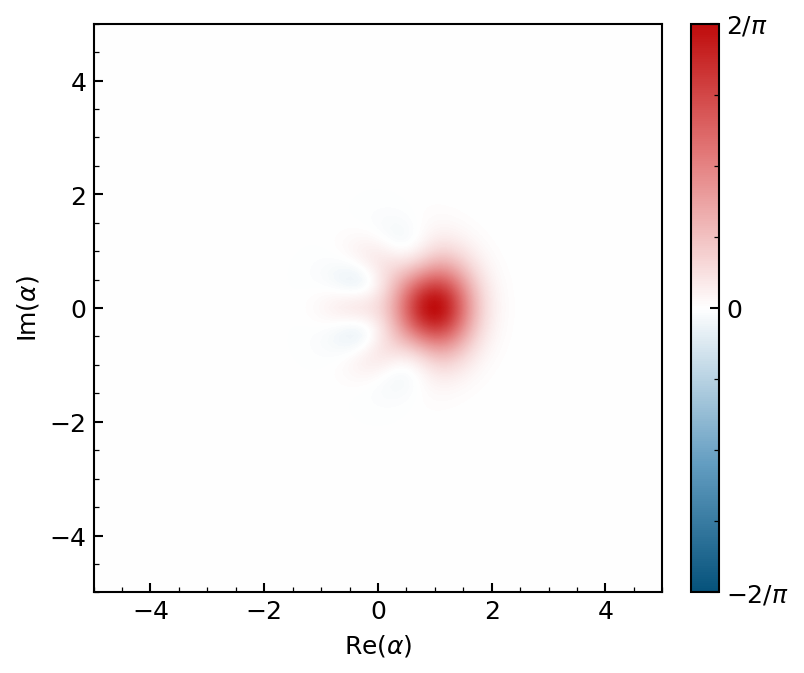

In [413]:
dq.plot.wigner(sampler.state)

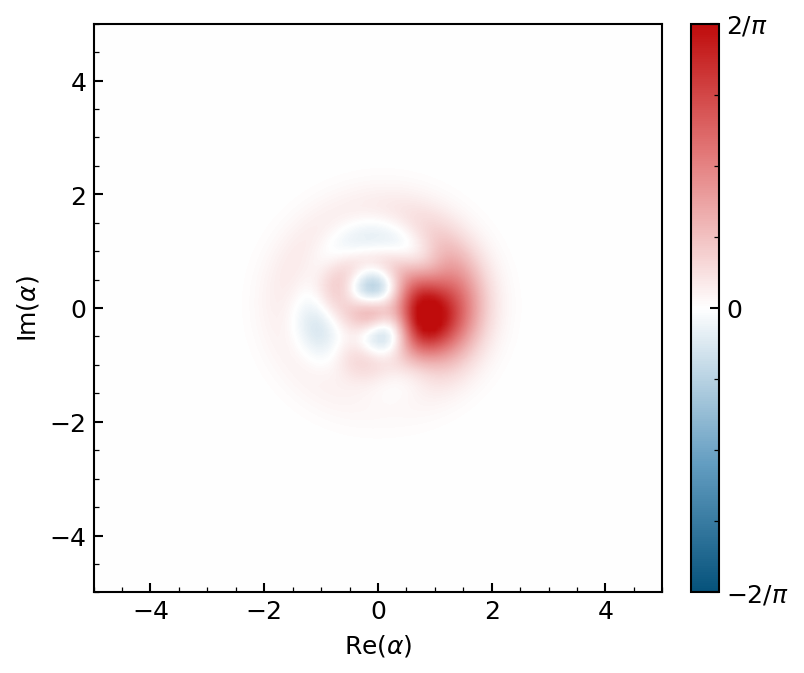

In [414]:
dq.plot.wigner(get_dm(reg.coef_))

In [416]:
dm_out = get_dm(reg.coef_)
dm_out /= dq.norm(dm_out)
dq.fidelity(sampler.state, )

TypeError: fidelity() missing 1 required positional argument: 'y'

In [418]:
dq.QArray(

Array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]], dtype=complex64)